In [38]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)

In [39]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"
figure_folder = "../../figures/tags_analysis"

In [40]:
import git
git = git.Git("../../../sonarqube/") 

### Import tags

In [88]:
alltags = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
alltags.Date = pd.to_datetime(alltags.Date)
alltags["month"] = alltags.Date.dt.month
alltags["year"] = alltags.Date.dt.year
tags = alltags.tail(-1)
tags

,Tag,Sha,Date,Tag_number,month,year
1,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020
2,8.4.1.35646,a0d372f704998d38856c26e28662fd7de062f873,2020-07-14 08:13:18,8.4.1.35646,7,2020
3,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,8.4.0.35506,7,2020
4,8.3.1.34397,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,2020-05-07 12:09:22,8.3.1.34397,5,2020
5,8.3.0.34182,9c58e36328ae79ad3c36c13aa253879351ce3613,2020-04-28 13:54:13,8.3.0.34182,4,2020
6,8.2.0.32929,749367809478e5b7f60c6ef952436db9789b5882,2020-02-25 14:32:24,8.2.0.32929,2,2020
7,8.1.0.31237,65a7a7c34de5bff9aed7c3e58eb6dcc87ae34b57,2019-12-17 12:29:34,8.1.0.31237,12,2019
8,8.0,87ca68d63f4afd37d74b2f454430dfde9e862c6a,2019-10-15 08:15:12,8.0,10,2019
9,7.9.4,2f8d99a55899105cbf3e3170194c614c2a6ea4d7,2020-07-23 14:40:10,7.9.4,7,2020
10,7.9.3,898a79cc7df01a9603c17f92b93e46ec62bc77d2,2020-03-24 07:49:27,7.9.3,3,2020


### Shape

In [42]:
tags.shape

(185, 6)

### Columns

In [43]:
tags.columns

Index(['Tag', 'Sha', 'Date', 'Tag_number', 'month', 'year'], dtype='object')

### Filter the ones after the project started using TravisCI

In [44]:
tags = tags[tags.Date > "2015-03-10"]

In [45]:
tags.Tag.nunique()

120

### Statistical summary

In [46]:
tags.describe()

,month,year
count,120.000000,120.00000
mean,5.566667,2016.75000
std,3.633951,1.34258
min,1.000000,2015.00000
25%,2.000000,2016.00000
50%,5.000000,2016.00000
75%,8.250000,2017.00000
max,12.000000,2020.00000


**Distribution over the years**

<AxesSubplot:xlabel='year', ylabel='Tag'>

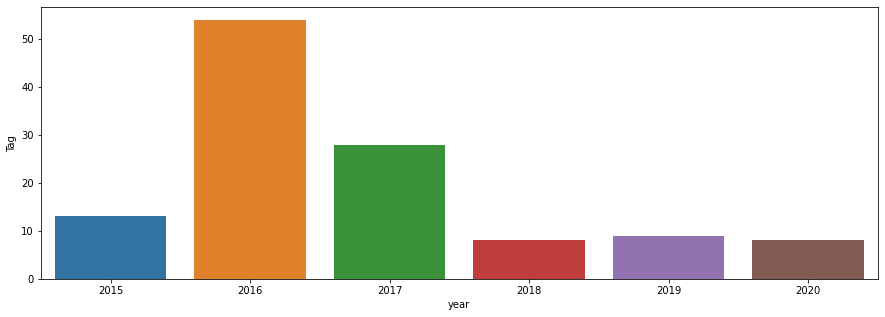

In [47]:
sns.barplot(x="year", y="Tag", data=tags.groupby("year").Tag.count().reset_index())

**Distribution overtime of the releases**

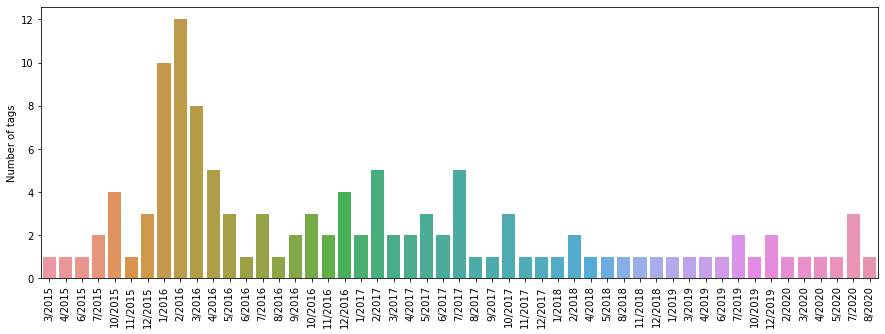

In [48]:
time_group = ["year", "month"]
x = tags.groupby(time_group).Tag.count().reset_index()
ax = sns.barplot(x=x.index, y=x.Tag)
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                      rotation=90)
ax.set(ylabel="Number of tags")
plt.savefig(f"{figure_folder}/time_distribution.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

**Major version counts**

In [49]:
tags["major_version"] = tags.Tag.apply(lambda s: s.split(".")[0])

In [50]:
tags.major_version.value_counts(normalize=True)

5    0.466667
6    0.350000
7    0.091667
8    0.066667
4    0.025000
Name: major_version, dtype: float64

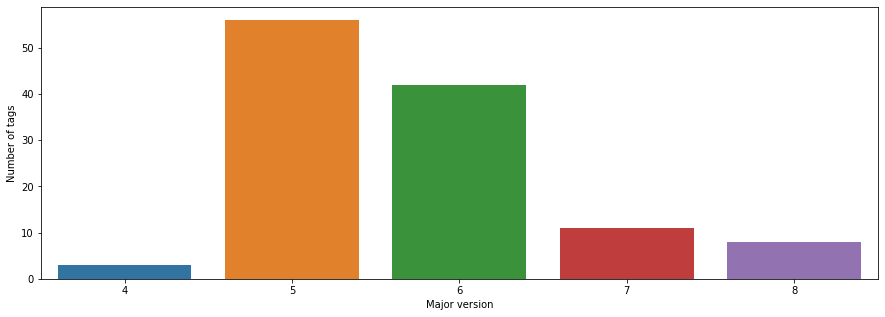

In [51]:
ax = sns.countplot(x=tags.major_version.sort_values())
ax.set_xlabel("Major version")
ax.set_ylabel("Number of tags")
plt.savefig(f"{figure_folder}/major_version.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

**Types of releases**

In [52]:
def type_of_release(tag):
    if "RC" in tag:
        return "Release candidate"
    if "M" in tag:
        return "Milestone"
    return "Normal version"

In [53]:
tags["type_of_release"] = tags.Tag.apply(type_of_release)

In [54]:
tags.type_of_release.value_counts(normalize=True)

Normal version       0.483333
Release candidate    0.266667
Milestone            0.250000
Name: type_of_release, dtype: float64

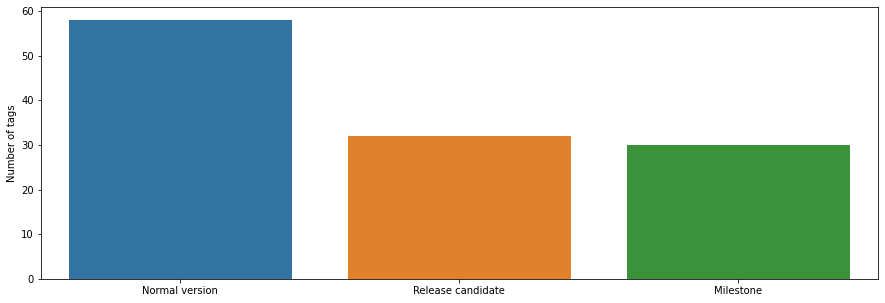

In [55]:
ax = sns.countplot(x=tags.type_of_release.sort_index())
ax.set_xlabel("")
ax.set_ylabel("Number of tags")
plt.savefig(f"{figure_folder}/type_of_releases.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

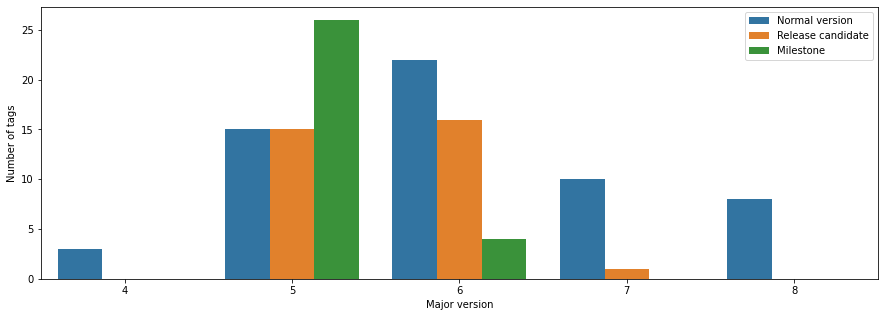

In [56]:
ax =sns.countplot(x="major_version", hue="type_of_release", data=tags, order=["4","5","6","7","8"])
ax.legend(loc="upper right")
ax.set(xlabel="Major version", ylabel="Number of tags")
plt.savefig(f"{figure_folder}/major_type_of_releases.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [57]:
tags[tags.type_of_release=="Release candidate"]

,Tag,Sha,Date,Tag_number,month,year,major_version,type_of_release
19,7.0-RC1,b19047de0e815b1c6474770e8bc0fff41daa4d01,2018-01-24 14:36:36,7.0,1,2018,7,Release candidate
28,6.7-RC1,3f72c27bf24dcecfad0e0901797e6d166532de72,2017-10-27 14:27:52,6.7,10,2017,6,Release candidate
30,6.6-RC1,868e9ce285262e5277c158ea3c2082c379e81943,2017-10-10 17:03:23,6.6,10,2017,6,Release candidate
32,6.5-RC2,fa58d92ea7145838c8030fc4611a4bdefe94b5de,2017-07-24 15:42:40,6.5,7,2017,6,Release candidate
33,6.5-RC1,3861f8769afa40e556c63ff7f39a41f9f89f68fa,2017-07-13 17:11:40,6.5,7,2017,6,Release candidate
39,6.4-RC3,1f978d91e82d8ddbe49806ee6d32bc93e8f6a42f,2017-05-29 09:55:18,6.4,5,2017,6,Release candidate
40,6.4-RC2,8e826b1066ffea29958f8c5ac09244baa624dafd,2017-05-22 10:00:44,6.4,5,2017,6,Release candidate
41,6.4-RC1,04b7bf3ccc22daea116a67e6ba174237805e5ccf,2017-05-16 15:00:32,6.4,5,2017,6,Release candidate
48,6.3-RC4,e23682d9e420ef59da282322ca9dc6e3fc59d75b,2017-03-04 17:53:45,6.3,3,2017,6,Release candidate
49,6.3-RC1,534fc279a64c7b836f39d476d15192999944b9eb,2017-02-14 11:06:25,6.3,2,2017,6,Release candidate


### Import tag comparison pairs

In [58]:
tags_comparison = pd.read_csv(f"{csv_folder}/tags_comparison_final.csv", index_col=0)
tags_comparison.from_commit_date = pd.to_datetime(tags_comparison.from_commit_date)
tags_comparison.to_commit_date = pd.to_datetime(tags_comparison.to_commit_date)
tags_comparison.from_author_date = pd.to_datetime(tags_comparison.from_author_date)
tags_comparison.to_author_date = pd.to_datetime(tags_comparison.to_author_date)
tags_comparison.head()

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
2307,4.5.5,2015-07-30 10:02:58,cc8a9472c671598fb3158b51b15863448a477a50,12d931e5a31e1692a428bbb34ba11cd63aebf998,16,0,4.5.6,2015-10-16 09:31:18,16,77 days 23:28:20,77.978009,2015-07-30 12:02:58,2015-10-16 11:31:18,77 days 23:28:20,77.978009
2296,4.5.6,2015-10-16 09:31:18,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,0,4.5.7,2016-04-08 13:44:39,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938
2257,5.1,2015-04-02 08:09:45,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,0,5.1.1,2015-06-02 08:34:06,7,61 days 00:24:21,61.016910,2015-04-02 10:09:45,2015-06-02 10:34:06,61 days 00:24:21,61.016910
2271,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,17,0,5.1,2015-04-02 08:09:45,17,9 days 16:46:58,9.699282,2015-03-23 16:22:47,2015-04-02 10:09:45,9 days 17:46:58,9.740949
2242,5.1.1,2015-06-02 08:34:06,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,0,5.1.2,2015-07-27 08:03:21,12,54 days 23:29:15,54.978646,2015-06-02 10:34:06,2015-07-27 10:03:21,54 days 23:29:15,54.978646


### Statistical summary

In [59]:
tags_comparison.describe()

,ahead_by,behind_by,ahead_behind_sum,diff_author_days,diff_commit_days
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,141.726496,0.068376,141.794872,30.812429,29.903889
std,358.064279,0.314218,358.083609,47.609832,46.746896
min,1.000000,0.000000,1.000000,-4.988113,-4.988113
25%,9.000000,0.000000,9.000000,4.230324,3.982072
50%,21.000000,0.000000,21.000000,9.880231,9.740949
75%,64.000000,0.000000,64.000000,42.885694,42.927361
max,2762.000000,2.000000,2762.000000,318.900104,320.931447


**Distribution of time difference in days between tag pairs**

In [60]:
tags_comparison.diff_commit_days.describe()

count    117.000000
mean      29.903889
std       46.746896
min       -4.988113
25%        3.982072
50%        9.740949
75%       42.927361
max      320.931447
Name: diff_commit_days, dtype: float64

<AxesSubplot:xlabel='diff_commit_days'>

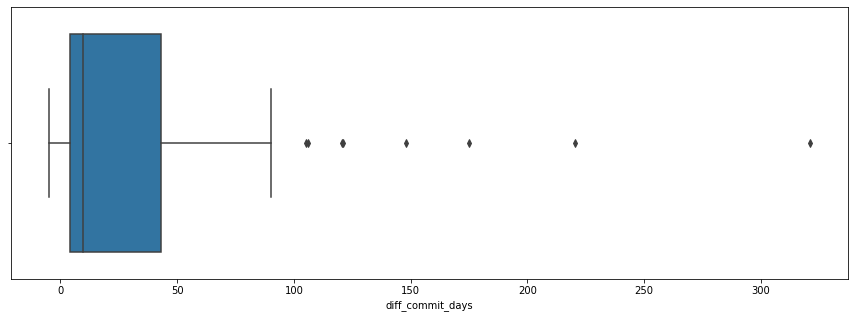

In [61]:
sns.boxplot(x=tags_comparison.diff_commit_days)

**Do pairs with negative days difference have a behind_by == 1 situation?**

In [62]:
tags_comparison[tags_comparison.diff_commit_days < 0]

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
1669,5.4-RC2,2016-02-15 15:38:37,e8f951d9f2a99975e31f82d97fce68f47e9242d3,8909ccd99b9bc5874f24395519d66e2bcb9bdacb,36,1,5.5-M1,2016-02-12 15:43:47,37,-3 days +00:05:10,-2.996412,2016-02-15 16:38:37,2016-02-15 09:09:03,-1 days +16:30:26,-0.312199
1188,5.6.1,2016-07-25 08:13:12,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,41affbb82c5e897eea64f77538ce4b20322ba61c,450,2,6.0-RC1,2016-07-20 08:30:19,452,-5 days +00:17:07,-4.988113,2016-07-25 10:13:12,2016-07-20 10:30:19,-5 days +00:17:07,-4.988113
113,7.9,2019-07-01 07:56:26,6502ec4ffee7e5a57498baaf330b80eb490d01c2,87ca68d63f4afd37d74b2f454430dfde9e862c6a,415,1,8.0,2019-10-15 08:15:12,416,106 days 00:18:46,106.013032,2019-10-17 15:24:45,2019-10-15 11:52:16,-3 days +20:27:31,-2.147558


Yes, this is the reason for the negative difference in days

**Pairs below the median**

In [63]:
len(tags_comparison[tags_comparison.diff_commit_days > tags_comparison.diff_commit_days.median()])

58

These could possibly be the versions with no bugs/issues reported

**Pais with smallest difference in days**

In [64]:
tags_comparison.loc[tags_comparison.diff_commit_days.idxmin()]

from_tag                                                5.6.1
from_author_date                          2016-07-25 08:13:12
from_sha             4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad
to_sha               41affbb82c5e897eea64f77538ce4b20322ba61c
ahead_by                                                  450
behind_by                                                   2
to_tag                                                6.0-RC1
to_author_date                            2016-07-20 08:30:19
ahead_behind_sum                                          452
diff_author_dates                           -5 days +00:17:07
diff_author_days                                     -4.98811
from_commit_date                          2016-07-25 10:13:12
to_commit_date                            2016-07-20 10:30:19
diff_commit_dates                           -5 days +00:17:07
diff_commit_days                                     -4.98811
Name: 1188, dtype: object

**Difference in days: pairs outliers**

In [65]:
tags_comparison[tags_comparison.diff_commit_days > 100]

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
2296,4.5.6,2015-10-16 09:31:18,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,0,4.5.7,2016-04-08 13:44:39,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938
1201,5.6.6,2017-02-16 20:34:26,05221592672b903c703c0424dc77458e615c106d,3de1bdeb3255fedc75885313205143f28aa89e9c,10,0,5.6.7,2017-09-25 10:46:49,10,220 days 14:12:23,220.591933,2017-02-16 21:34:26,2017-09-25 12:46:49,220 days 15:12:23,220.633600
344,6.7.5,2018-08-06 10:17:09,ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1,302f75de1ec5df6e983970f3c76b86ee02b1cd26,16,0,6.7.6,2018-11-19 15:51:14,16,105 days 05:34:05,105.232002,2018-08-06 12:17:09,2018-11-19 17:49:11,105 days 05:32:02,105.230579
325,6.7.6,2018-11-19 15:51:14,302f75de1ec5df6e983970f3c76b86ee02b1cd26,4aa6d928f960303eb990d50c275513a517c85e69,12,0,6.7.7,2019-04-16 15:38:04,12,147 days 23:46:50,147.990856,2018-11-19 17:49:11,2019-04-16 17:38:04,147 days 23:48:53,147.992280
268,7.0,2018-02-02 12:20:31,3b827a9a9a4b133c9fbe168aec8db44d78efeaeb,cb851ba202973bd468e070572c1e3b0b0437d2f4,1801,0,7.5,2018-12-18 09:56:40,1801,318 days 21:36:09,318.900104,2018-02-02 13:20:31,2018-12-20 11:41:48,320 days 22:21:17,320.931447
192,7.8,2019-06-18 09:08:04,870ae4efbf5dcdbe59295eb5827b55a6a74c7b89,6502ec4ffee7e5a57498baaf330b80eb490d01c2,141,0,7.9,2019-07-01 07:56:26,141,12 days 22:48:22,12.950255,2019-06-18 20:21:07,2019-10-17 15:24:45,120 days 19:03:38,120.794190
92,7.9.2,2019-12-09 13:03:50,5832fefc31f5ba25f15b3fa66ed816f7b87fd835,898a79cc7df01a9603c17f92b93e46ec62bc77d2,11,0,7.9.3,2020-03-24 07:49:27,11,105 days 18:45:37,105.781678,2019-12-09 20:53:13,2020-03-24 20:03:32,105 days 23:10:19,105.965498
73,7.9.3,2020-03-24 07:49:27,898a79cc7df01a9603c17f92b93e46ec62bc77d2,2f8d99a55899105cbf3e3170194c614c2a6ea4d7,14,0,7.9.4,2020-07-23 14:40:10,14,121 days 06:50:43,121.285220,2020-03-24 20:03:32,2020-07-23 20:05:45,121 days 00:02:13,121.001539


**Investigate the maximum difference in days value**

In [66]:
tags_comparison.loc[tags_comparison.diff_commit_days.idxmax()].to_frame()

,268
from_tag,7.0
from_author_date,2018-02-02 12:20:31
from_sha,3b827a9a9a4b133c9fbe168aec8db44d78efeaeb
to_sha,cb851ba202973bd468e070572c1e3b0b0437d2f4
ahead_by,1801
behind_by,0
to_tag,7.5
to_author_date,2018-12-18 09:56:40
ahead_behind_sum,1801
diff_author_dates,318 days 21:36:09


In [67]:
tags_comparison[tags_comparison.to_tag=="7.5"]

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
268,7.0,2018-02-02 12:20:31,3b827a9a9a4b133c9fbe168aec8db44d78efeaeb,cb851ba202973bd468e070572c1e3b0b0437d2f4,1801,0,7.5,2018-12-18 09:56:40,1801,318 days 21:36:09,318.900104,2018-02-02 13:20:31,2018-12-20 11:41:48,320 days 22:21:17,320.931447


We confirm that this is the best pairing. There seem to miss versions between 7.0 and 7.5 but they are not present on GitHub

### Ahead by distribution

<AxesSubplot:xlabel='ahead_by'>

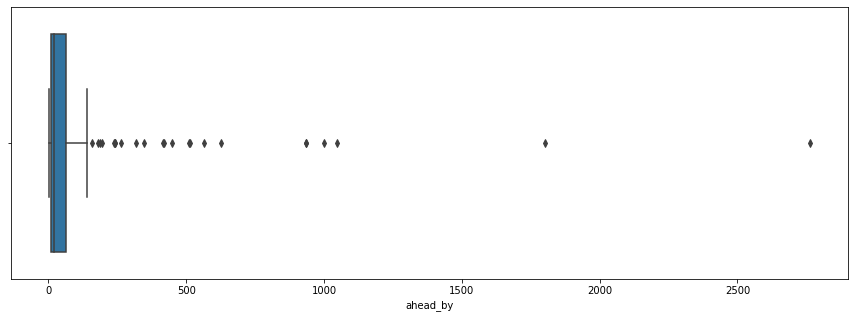

In [68]:
sns.boxplot(x=tags_comparison.ahead_by)

In [69]:
tags_comparison

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
2307,4.5.5,2015-07-30 10:02:58,cc8a9472c671598fb3158b51b15863448a477a50,12d931e5a31e1692a428bbb34ba11cd63aebf998,16,0,4.5.6,2015-10-16 09:31:18,16,77 days 23:28:20,77.978009,2015-07-30 12:02:58,2015-10-16 11:31:18,77 days 23:28:20,77.978009
2296,4.5.6,2015-10-16 09:31:18,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,0,4.5.7,2016-04-08 13:44:39,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938
2257,5.1,2015-04-02 08:09:45,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,0,5.1.1,2015-06-02 08:34:06,7,61 days 00:24:21,61.016910,2015-04-02 10:09:45,2015-06-02 10:34:06,61 days 00:24:21,61.016910
2271,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,17,0,5.1,2015-04-02 08:09:45,17,9 days 16:46:58,9.699282,2015-03-23 16:22:47,2015-04-02 10:09:45,9 days 17:46:58,9.740949
2242,5.1.1,2015-06-02 08:34:06,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,0,5.1.2,2015-07-27 08:03:21,12,54 days 23:29:15,54.978646,2015-06-02 10:34:06,2015-07-27 10:03:21,54 days 23:29:15,54.978646
2226,5.1.2,2015-07-27 08:03:21,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,2762,0,5.2-RC1,2015-10-12 15:58:42,2762,77 days 07:55:21,77.330104,2015-07-27 10:03:21,2015-10-12 17:58:42,77 days 07:55:21,77.330104
2172,5.2,2015-11-02 08:56:19,f045be98be3ba032b6b19d71574038eeeb91803b,c979578645aaf77c447b250136db32a7067619a1,513,0,5.3-RC1,2015-12-09 12:47:34,513,37 days 03:51:15,37.160590,2015-11-02 09:56:19,2015-12-09 13:47:34,37 days 03:51:15,37.160590
2209,5.2-RC1,2015-10-12 15:58:42,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,4,0,5.2-RC2,2015-10-13 10:06:23,4,0 days 18:07:41,0.755336,2015-10-12 17:58:42,2015-10-13 12:06:23,0 days 18:07:41,0.755336
2191,5.2-RC2,2015-10-13 10:06:23,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,ef358b002383f918448dcb5e8ac40b64a35a4c26,56,0,5.2-RC3,2015-10-20 13:47:33,56,7 days 03:41:10,7.153588,2015-10-13 12:06:23,2015-10-20 15:47:33,7 days 03:41:10,7.153588
2153,5.3-RC1,2015-12-09 12:47:34,c979578645aaf77c447b250136db32a7067619a1,29a84111f6cc9298f83df515830ff40a41d0976c,40,1,5.3-RC2,2015-12-17 16:02:01,41,8 days 03:14:27,8.135035,2015-12-09 13:47:34,2015-12-17 17:02:01,8 days 03:14:27,8.135035


**Let's investigate the outliers**

In [70]:
tags_comparison[tags_comparison.ahead_by > 200][["from_tag", "to_tag", "ahead_by"]]

,from_tag,to_tag,ahead_by
2226,5.1.2,5.2-RC1,2762
2172,5.2,5.3-RC1,513
1372,5.5,5.6-RC1,318
1188,5.6.1,6.0-RC1,450
1105,6.0,6.1-RC1,564
1044,6.1.1,6.2-RC1,627
874,6.2.1,6.3-RC1,936
873,6.2.1,6.3.0.18401,936
731,6.3.2,6.4-RC1,1001
515,6.5,6.6-RC1,1046


**Investigate the pairs with smallest ahead_by**

In [71]:
tags_comparison.sort_values(by="ahead_by").head(5)[["from_tag", "to_tag", "ahead_by"]]

,from_tag,to_tag,ahead_by
590,6.5-RC1,6.5-M3,1
553,6.5-RC2,6.5-M4,1
2115,5.3-RC3,5.3,2
1391,5.5-RC2,5.5,3
1220,5.6.5,5.6.6,3


**Investigate minumum ahead_by**

In [72]:
tags_comparison.loc[tags_comparison.ahead_by.idxmin()].to_frame()

,590
from_tag,6.5-RC1
from_author_date,2017-07-13 17:11:40
from_sha,3861f8769afa40e556c63ff7f39a41f9f89f68fa
to_sha,ca28dd4ed34ab7c6e6066dd44820fe815c21b7a8
ahead_by,1
behind_by,0
to_tag,6.5-M3
to_author_date,2017-07-13 17:56:59
ahead_behind_sum,1
diff_author_dates,0 days 00:45:19


We would expect 6.5-M3 to be paired with 6.5-M2 if it exists. Let's see how 6.5-M3 performed when compared with the other tags.

In [73]:
compare_tags[(compare_tags.ahead_by>0)&(compare_tags.behind_by<2)]\
[compare_tags.to_tag=="6.5-M3"].sort_values(by="ahead_by").head(5)

NameError: name 'compare_tags' is not defined

6.5-M2 is in the list and is a fast-forward of only 67 commits. However, 6.5-M3 seems more similar to 6.5-RC1. Let's see if 6.5-M2 has been used as "from_tag" and with which tag.

In [ ]:
tags_comparison[tags_comparison.from_tag=="6.5-M2"]

It has been correclty paired with 6.5-RC1.

**Investigate maximum ahead_by**

In [ ]:
tags_comparison.loc[tags_comparison.ahead_by.idxmax()].to_frame()

**Number of ahead commits distribution over time**

In [ ]:
tags_comparison["to_commit_date_month"] = tags_comparison.to_commit_date.dt.month
tags_comparison["to_commit_date_year"] = tags_comparison.to_commit_date.dt.year

data = tags_comparison.groupby(["to_commit_date_year","to_commit_date_month"]).ahead_by.mean().reset_index()
ax = sns.barplot(y = data.ahead_by, x= data.apply(lambda row: f"{str(int(row.to_commit_date_month))}/{str(int(row.to_commit_date_year))}", axis=1))
ax.tick_params(axis='x', labelrotation= 60)

In [ ]:
data = tags_comparison.groupby(["to_commit_date_year"]).ahead_by.mean().reset_index()
sns.barplot(y=data.ahead_by, x=data.to_commit_date_year)

* The difference in days between 2 tags is negative: we should not worry about this. Some tags have been compared with one behind of it of at most 1 commit. The negative difference is be due to this extra commit.
* Tag 7.5 has a 320 days difference with its tag comparison (7.0). We double checked on GitHub and there are no versions between 7.0 and 7.5 and our comparisons with other tags confirm that 7.0 is the most similar to 7.5
* All the outliers in number of ahead_commits are changes to at least minor version in some cases major.

### Versions on Jira

In [74]:
map_versions = {"8.5.0.37579": "8.5",
               "8.4.0.35506": "8.4",
               "8.3.0.34182": "8.3",
               "8.3.1.34397": "8.3.1",
               "8.2.0.32929": "8.2",
               "8.1.0.31237": "8.1",
               "8.4.2.36762": "8.4.2",
               "8.4.1.35646": "8.4.1",
                 '6.3.0.18401':"6.3",
                 '6.3.0.18587':"6.3",
                 '6.3.0.18800':"6.3"}

In [75]:
def replace_versions(tag):
    if(tag in map_versions):
        return map_versions[tag]
    return tag

In [76]:
jira_versions = ['4.5', '4.5.1', '4.5.2', '4.5.4', '4.5.5', '4.5.6', '4.5.7', '5.0',
       '5.0.1', '5.1', '5.1.1', '5.1.2', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.6.1', '5.6.2', '5.6.3', '5.6.4', '5.6.5', '5.6.6',
       '5.6.7', '6.0', '6.1', '6.1.1', '6.2', '6.3', '6.3.1', '6.3.2',
       '6.4', '6.5', '6.5-M1', '6.6', '6.6-M1', '6.7', '6.7.1', '6.7.2',
       '6.7.3', '6.7.4', '6.7.5', '6.7.6', '6.7.7', '7.0', '7.1', '7.2',
       '7.2.1', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.9.1',
       '7.9.2', '7.9.3', '7.9.4', '8.0', '8.1', '8.2', '8.3', '8.3.1',
       '8.4', '8.4.1', '8.4.2']

**Github tags not present on Jira**

In [77]:
github_no_jira = pd.Series(list(set(tags.Tag.apply(replace_versions)).difference(set(jira_versions))))

In [78]:
def type_of_version(tag):
    if "M" in tag:
        return "Milestone"
    if "RC" in tag:
        return "Release candidates"
    return "Normal semantic version"

In [79]:
github_no_jira.apply(type_of_version).value_counts(normalize=True)

Release candidates         0.516129
Milestone                  0.467742
Normal semantic version    0.016129
dtype: float64

<AxesSubplot:ylabel='count'>

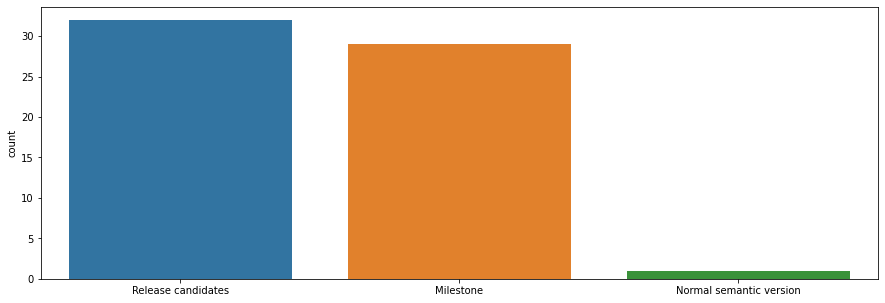

In [80]:
sns.countplot(x=github_no_jira.apply(type_of_version))

In [81]:
github_no_jira

0     6.0-RC1
1     5.3-RC2
2     6.3-RC4
3     6.0-RC2
4     6.4-RC1
5     6.7-RC1
6     6.2-RC3
7      5.4-M7
8     5.4-M10
9     5.5-RC1
10     6.5-M4
11    6.4-RC3
12    5.6-RC1
13     5.5-M5
14    7.0-RC1
15     5.4-M8
16    5.3-RC3
17    5.5-M10
18     5.4-M5
19    5.4-RC3
20     5.4-M2
21    6.5-RC1
22    5.2-RC1
23     6.5-M3
24      6.2.1
25     5.4-M9
26    5.5-M11
27    5.5-M14
28    5.4-M14
29    5.4-M12
30     5.5-M3
31     5.5-M2
32    5.5-M13
33    6.1-RC2
34     5.5-M4
35     5.4-M1
36    6.4-RC2
37    6.5-RC2
38    5.5-RC2
39    5.4-RC1
40    5.4-M13
41     5.4-M6
42    6.2-RC1
43    6.2-RC2
44    5.2-RC2
45     5.4-M4
46    5.6-RC2
47     5.4-M3
48    6.1-RC1
49    5.4-RC4
50    5.5-M12
51    5.4-RC2
52    6.3-RC1
53     6.5-M2
54     5.5-M1
55    5.4-M11
56    5.2-RC3
57    6.6-RC1
58     5.5-M7
59     5.5-M6
60    5.1-RC2
61    5.3-RC1
dtype: object

**Investigate the only semantic version**

In [82]:
tags_comparison[(tags_comparison.from_tag=="6.2.1") | (tags_comparison.to_tag=="6.2.1")]

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
960,6.2,2016-12-13 15:05:23,4a28f29f95254b58f3cf0a0871bc632e998403f5,8a667b2e3358144ea6d0affaf7673ebd290b0b78,21,0,6.2.1,2017-01-16 16:00:20,21,34 days 00:54:57,34.038160,2016-12-13 16:05:23,2017-01-16 17:00:20,34 days 00:54:57,34.038160
874,6.2.1,2017-01-16 16:00:20,8a667b2e3358144ea6d0affaf7673ebd290b0b78,534fc279a64c7b836f39d476d15192999944b9eb,936,0,6.3-RC1,2017-02-14 11:06:25,936,28 days 19:06:05,28.795891,2017-01-16 17:00:20,2017-02-14 12:06:25,28 days 19:06:05,28.795891
873,6.2.1,2017-01-16 16:00:20,8a667b2e3358144ea6d0affaf7673ebd290b0b78,534fc279a64c7b836f39d476d15192999944b9eb,936,0,6.3.0.18401,2017-02-14 11:06:25,936,28 days 19:06:05,28.795891,2017-01-16 17:00:20,2017-02-14 12:06:25,28 days 19:06:05,28.795891


<AxesSubplot:xlabel='ahead_by'>

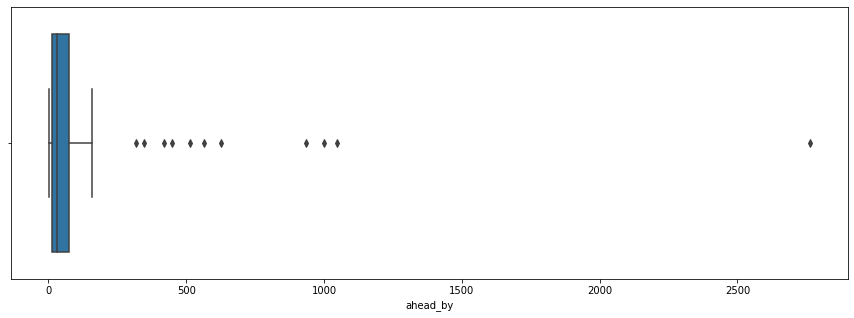

In [83]:
sns.boxplot(x=tags_comparison[tags_comparison.to_tag.isin(github_no_jira.values)].ahead_by)

<AxesSubplot:xlabel='ahead_by'>

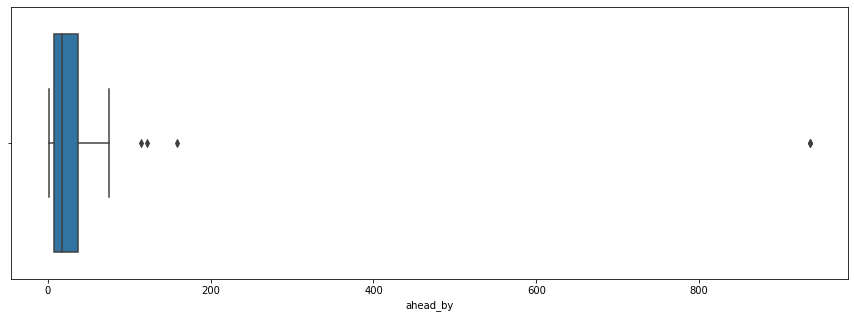

In [84]:
sns.boxplot(x=tags_comparison[tags_comparison.from_tag.isin(github_no_jira.values)].ahead_by)

In [85]:
tags_comparison[tags_comparison.from_tag.isin(github_no_jira.values)]

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
2271,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,17,0,5.1,2015-04-02 08:09:45,17,9 days 16:46:58,9.699282,2015-03-23 16:22:47,2015-04-02 10:09:45,9 days 17:46:58,9.740949
2209,5.2-RC1,2015-10-12 15:58:42,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,4,0,5.2-RC2,2015-10-13 10:06:23,4,0 days 18:07:41,0.755336,2015-10-12 17:58:42,2015-10-13 12:06:23,0 days 18:07:41,0.755336
2191,5.2-RC2,2015-10-13 10:06:23,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,ef358b002383f918448dcb5e8ac40b64a35a4c26,56,0,5.2-RC3,2015-10-20 13:47:33,56,7 days 03:41:10,7.153588,2015-10-13 12:06:23,2015-10-20 15:47:33,7 days 03:41:10,7.153588
2153,5.3-RC1,2015-12-09 12:47:34,c979578645aaf77c447b250136db32a7067619a1,29a84111f6cc9298f83df515830ff40a41d0976c,40,1,5.3-RC2,2015-12-17 16:02:01,41,8 days 03:14:27,8.135035,2015-12-09 13:47:34,2015-12-17 17:02:01,8 days 03:14:27,8.135035
2098,5.3-RC2,2015-12-17 16:02:01,29a84111f6cc9298f83df515830ff40a41d0976c,d7ea0a8b14b8649144f7bfbff055f207d954d6c9,53,0,5.4-M2,2015-12-28 12:01:19,53,10 days 19:59:18,10.832847,2015-12-17 17:02:01,2015-12-28 13:01:19,10 days 19:59:18,10.832847
2134,5.3-RC2,2015-12-17 16:02:01,29a84111f6cc9298f83df515830ff40a41d0976c,e735681d1b11ff0e90c254a3b5302e290ffa05a6,7,0,5.3-RC3,2016-01-07 13:18:48,7,20 days 21:16:47,20.886655,2015-12-17 17:02:01,2016-01-07 14:18:48,20 days 21:16:47,20.886655
2115,5.3-RC3,2016-01-07 13:18:48,e735681d1b11ff0e90c254a3b5302e290ffa05a6,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,2,0,5.3,2016-01-08 10:09:15,2,0 days 20:50:27,0.868368,2016-01-07 14:18:48,2016-01-08 11:09:15,0 days 20:50:27,0.868368
1916,5.4-M10,2016-01-28 16:10:59,bea2847df13b73c7364193419873e3e8b47b5b73,84d4f441879de01734bb9041fc0cdfbd461386ee,37,0,5.4-M11,2016-02-01 14:45:36,37,3 days 22:34:37,3.940706,2016-01-28 17:10:59,2016-02-01 16:45:10,3 days 23:34:11,3.982072
1895,5.4-M11,2016-02-01 14:45:36,84d4f441879de01734bb9041fc0cdfbd461386ee,ca8c711145a11e61a3c6571cef38cf8d53b5d423,61,0,5.4-M12,2016-02-03 12:52:05,61,1 days 22:06:29,1.921169,2016-02-01 16:45:10,2016-02-04 10:10:10,2 days 17:25:00,2.725694
1874,5.4-M12,2016-02-03 12:52:05,ca8c711145a11e61a3c6571cef38cf8d53b5d423,27858608f46ae9f1cd2c2269151e68f56f882417,28,0,5.4-M13,2016-02-05 10:17:45,28,1 days 21:25:40,1.892824,2016-02-04 10:10:10,2016-02-05 11:43:32,1 days 01:33:22,1.064838


**Jira affected versions not present in Github tags**

In [86]:
jira_no_github = set(set(jira_versions)).difference(tags.Tag.apply(replace_versions))

In [87]:
jira_no_github

{'4.5',
 '4.5.1',
 '4.5.2',
 '4.5.4',
 '5.0',
 '5.0.1',
 '6.6-M1',
 '7.1',
 '7.2',
 '7.2.1',
 '7.3',
 '7.4'}

In [ ]:
alltags

In [ ]:
before_travis_versions = ['4.5',
 '4.5.1',
 '4.5.2',
 '4.5.4',
 '5.0',
 '5.0.1']

**Intersection of versions**

In [ ]:
pd.Series(list(set(tags.Tag.apply(replace_versions)).intersection(set(jira_versions))))

### Retrieving missing versions commits

Versions retrived by inspecting commit history on the file containing the sw version: gradle.properties

In [ ]:
missing_vers = {
"7.0": "3b827a9a9a4b133c9fbe168aec8db44d78efeaeb",
"7.1": "ecdde3879059a41f229782061bdad49677dd63f8",
"7.2": "d7828ea4d821aaceedd431004c83a196cea8b38a",
 "7.3": "87c1e3d93bf8a583932c11d4e1b740e91f80ffa0",
"7.4": "86937350807da2beb38dcd4216eafea0009fb99f",
"7.5": "cb851ba202973bd468e070572c1e3b0b0437d2f4"}

pairs = {
    "7.0": "7.1",
    "7.1": "7.2",
    "7.2": "7.3",
    "7.3": "7.4",
    "7.4": "7.5"
}

In [ ]:
for pair in pairs:
    print(git.rev_list("--left-right", "--count", f"{missing_vers[pair]}...{missing_vers[pairs[pair]]}"))

In [ ]:
new_versions = [("7.1","ecdde3879059a41f229782061bdad49677dd63f8","2018-03-23 20:20:52","7.1",3,2018,7),
("7.2", "d7828ea4d821aaceedd431004c83a196cea8b38a","2018-06-13 20:20:50","7.2",6,2018,7),
 ("7.3", "87c1e3d93bf8a583932c11d4e1b740e91f80ffa0","2018-07-20 20:21:18","7.3",7,2018,7),
("7.4", "86937350807da2beb38dcd4216eafea0009fb99f","2018-08-03 20:21:25","7.4",8,2018,7)]

df = pd.DataFrame(new_versions, columns=tags.columns)
tags_updated = tags.append(df).sort_values(by="Tag")
#tags_updated = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
tags_updated.Date = pd.to_datetime(tags_updated.Date)
tags_updated

### Add actual release dates

In [ ]:
release_dates = {'4.5.6':None,
 '4.5.7':None,
 '5.1': "2015-04-23",
 '5.1.1': "",
 '5.1.2':None,
 '5.2': "2015-11-26",
 '5.3':"2016-01-28",
 '5.4':"2016-04-01",
 '5.5':"2016-05-19",
 '5.6':"2016-06-08",
 '5.6.1':None,
 '5.6.2':None,
 '5.6.3':None,
 '5.6.4':None,
 '5.6.5':None,
 '5.6.6':None,
 '5.6.7':None,
 '6.0':"2016-08-16",
 '6.1':"2016-10-25",
 '6.1.1':None,
 '6.2':"2017-01-05",
 '6.3':"2017-04-12",
 '6.3.1':None,
 '6.3.2':None,
 '6.4':"2017-06-29",
 '6.5':"2017-08-10",
 '6.5-M1':None,
 '6.6':"2017-10-20",
 '6.7':"2017-11-08",
 '6.7.1':None,
 '6.7.2':None,
 '6.7.3':None,
 '6.7.4':None,
 '6.7.5':None,
 '6.7.6':None,
 '6.7.7':None,
 '7.0':"2019-07-01",
 '7.1':"2019-07-01",
 '7.2':"2018-06-18",
 '7.3':"2018-08-13",
 '7.4':"2018-10-29",
 '7.5':"2018-12-20",
 '7.6':"2019-01-28",
 '7.7':"2019-03-20",
 '7.8':"2019-06-19",
 '7.9':"2019-07-01",
 '7.9.1':None,
 '7.9.2':None,
 '7.9.3':None,
 '7.9.4':None,
 '8.0':"2019-10-16",
 '8.1':"2019-12-16",
 '8.2':"2020-02-26",
 '8.3':"2020-04-30",
 '8.3.1':None,
 '8.4':"2020-07-07 00:00:00",
 '8.4.1':None,
 '8.4.2':None}
#Taken from https://blog.sonarsource.com/search?q=5.2%20in%20screenshots and https://www.sonarqube.org/whats-new/

In [ ]:
tags_updated["jira_version"] = tags_updated.Tag.apply(replace_versions)

In [ ]:
tags_updated

In [ ]:
release_dates_series = pd.Series(release_dates)
release_dates_series.index.name="version_name"
release_dates_df = release_dates_series.reset_index()
release_dates_df.rename(columns={0:"actual_release_date"}, inplace=True)
release_dates_df.actual_release_date = pd.to_datetime(release_dates_df.actual_release_date)
tags_updated = release_dates_df.merge(tags_updated, left_on="version_name", right_on="jira_version")

In [ ]:
tags_updated = tags_updated.drop(columns=["version_name", "Tag_number"])
tags_updated

In [ ]:
tags_updated.actual_release_date.notna().sum()

**Only one tag for jira version (i.e 6.3.0.x mapped to 6.3)**

In [ ]:
tags_updated = tags_updated.drop_duplicates(subset='jira_version', keep="first")
tags_updated

In [ ]:
tags_updated.to_csv(f"{csv_folder}/tags_updated.csv")

### Export versions without RC and Milestones

In [ ]:
tags_updated[(~tags_updated.Tag.str.contains("RC")) & (~tags_updated.Tag.str.contains("M"))].to_csv(f"{csv_folder}/tags_no_rc_and_milestones.csv")

In [ ]:
pd.read_csv(f"{csv_folder}/tags_no_rc_and_milestones.csv", index_col=0)